**AUTHOR: MOKULA SAI KHALANDAR** 

# Graduate Rotational Internship Program :The Sparks Foundation #GRIPJULY21 


#TASK 1: Prediction using Supervised ML

**Objective: Predict the score of students given the number of hours of study.**

Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

In [3]:
data_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [4]:
df = pd.read_csv(data_url)

**Data Analysis**


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Dataset contains 25 entries(samples) with each entry having 2 feature variables:**
>'Hours' - Feature variable(Independent Variable).\
> 'Scores' - our target variable(Dependent variable). 

In [7]:
#sorting the data in increasing order of hours
df.sort_values(by='Hours')

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30
20,2.7,30
9,2.7,25
2,3.2,27
13,3.3,42
4,3.5,30


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
m = [df.mean()[0],df.median()[0],df.mode().iloc[0][0]]
n = [df.mean()[1],df.median()[1],df.mode().iloc[0][1]]
pd.DataFrame({'Hours':m,"Scores":n},index=['mean','median','mode'])

,Hours,Scores
mean,5.012,51.48
median,4.800,47.00
mode,2.500,30.00


**HOURS:** mean > median > mode\
**SCORES:**  mean> median> mode           
This tells that the distribution is right skewed not by much but partially as the values are not so far from each other.

**Checking the amount of skewness**

In [10]:
#checking the amount of skewness
print("Skewness of Hours variable:" ,df['Hours'].skew())
print("Skewness of Scores variable:" ,df['Scores'].skew())

Skewness of Hours variable: 0.1903382010052985
Skewness of Scores variable: 0.2339646665397317


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


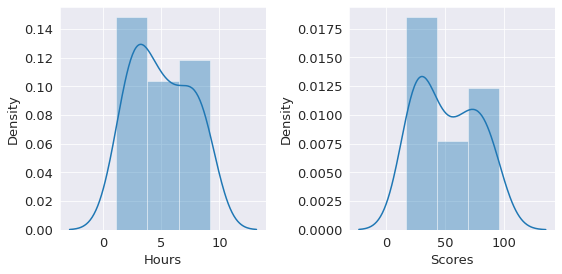

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(df['Hours'])
plt.subplot(1,2,2)
sns.distplot(df['Scores'])
plt.tight_layout()

**Observation: As the Value of skewness is in between -0.5 and 0.5 the Distribution is fairly Symmetrical (lightly right skewed) .So, we proceed to train our model with this data without need of any transformation.**

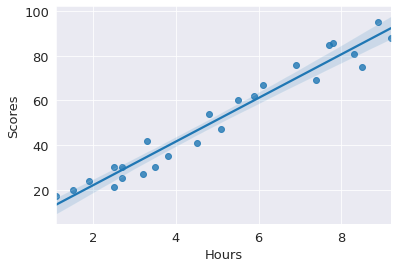

In [12]:
#regression plot of 'Hours' vs 'Scores'
sns.regplot(x='Hours',y='Scores',data=df)

**Observation: 'Scores' variable is in linear relationship with independent variable i.e. 'Hours'.**

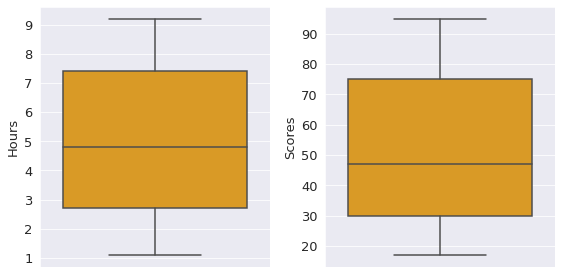

In [13]:
#creating subplots in a single row.
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
#position, to specify where to plot in the subplots axes created above,
index = 0
for k,v in df.items():
  #Plotting Boxplot, 
  sns.boxplot(y=k,data=df,ax=axs[index],saturation=0.7,color='orange')
  index+=1
plt.tight_layout()

**Observation : We can clearly see that there are no outliers present in the data.**

In [14]:
x = df['Hours'].values
x = x.reshape(-1,1)
y = df['Scores'].values

**Splitting the data into train and test set**

In [15]:
#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (20, 1)
y_train shape:  (20,)
x_test shape:  (5, 1)
y_test shape:  (5,)


**Importing Evaluatuion Metrics**

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Linear Regression Implementation using Numpy

In [19]:
import math
class LinearRegression:
    """
    Simple Linear Regression.
    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.
    
    Parameters
    ----------
    X: Independent Feature vectors from the dataset.
    y: Dependent variable(Target variable) from the dataset.
    l_rate: Learning rate for Gradient Descent Optimization.
    
    Attributes
    ----------
    theta: Paramter Matrix , Calculated Weights of each feature variable.
    residual : Difeerence between actual and predicted target variable,used for evaluation.
    y_pred_final : Final prediction on training set obtained after maximum optimization of theta.
    
    Notes
    -----
    From the implementation point of view, this is just very basic plain Linear Regression 
    with Gradient Descent implementation.
    """
    
    def __init__(self,x,y,l_rate):
        """
        x: input shape: M,N
            M: no of training examples.
            N: no of features.
        y: target shape:M,1
        l_rate: floating point number.
        """
        self.x = x
        self.y = y
        self.l_rate = l_rate

    def initialize_theta(self,initialization="Zeros"):
        """
        Initialize parmater theta to Zeros,Random or He initilization on basis of 
        parameter initialization
        Theta : parameter shape:N,1
        N: no of features.
        """
        n = self.x.shape[1]
        if initialization == "Zeros":
            self.theta = np.zeros((n,1))
        elif initialization == "Random":
            self.theta = np.random.randn(n,1)
    
    def Residuals(self):
        """
        Calculate the prediction(target variable) 
        prediction [M,1]: M,N dot N,1 matrix of values
        return:
            Residual(difference between original and prediction)
            shape : M,1
        """
        y_pred = np.dot(self.x,self.theta)
        self.residual = y_pred - self.y
       # print(y_pred.shape)

    def Cost(self):
        """
        return:
            cost 1/2*m(sum(residual*residual))
        """
        self.Residuals()
        self.m = self.x.shape[0]
        self.cost = np.square(self.residual)/(2*self.m)
        return np.sum(self.cost,axis=0)
    def update_theta(self):
        """
        Updating the parameter matrix theta of dimension N*1 for optimizing performance
        """
        #print(self.x.shape,self.residual.shape)
        self.theta-= self.l_rate*np.dot(self.x.T,self.residual)
      
    def final_prediciton(self):
        """
        return:
        Train_set prediction
        shape: M,1
        """
        #self.y_pred_final = np.dot(self.x,self.theta)
        return np.dot(self.x,self.theta)
    def predict_sample(self,test):
        """
        return :
        sample prediction
        shape: S,1
        S: no of samples
        """
        #self.y_pred_final=np.dot(test,self.theta)
        return np.dot(test,self.theta)

**Creating an instance of the model**

In [20]:
lr = LinearRegression(x_train,y_train.reshape(len(y_train),1),l_rate= 0.00001)

**Initilizing Weights(paramters) W1 in this case**

In [21]:
lr.initialize_theta(initialization="Zeros")

**Updating Weights by performing Gradient Descent**

In [22]:
n_iterations =600 #125
costs=[]
for i in range(n_iterations):
    costs.append(lr.Cost())
    #performing gradient descent
    lr.update_theta()

In [23]:
predictions = lr.final_prediciton()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


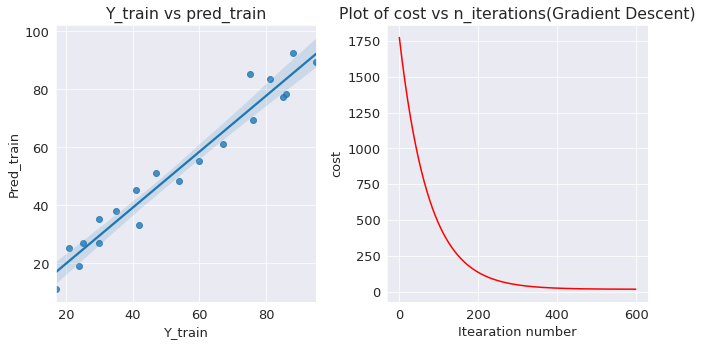

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#plt.scatter(y_train_sc,predictions)
sns.regplot(pd.Series(data=np.ravel(y_train),name='y_orig'),pd.Series(data=np.ravel(predictions),name='predictions'))
plt.title("Y_train vs pred_train")
plt.xlabel("Y_train")
plt.ylabel("Pred_train")

plt.subplot(1,2,2)
plt.plot(range(n_iterations),np.squeeze(costs),'r')
plt.title('Plot of cost vs n_iterations(Gradient Descent)')
plt.xlabel('Itearation number')
plt.ylabel('cost')
plt.tight_layout()

**Making Predicitons on train set(seen data)**

In [25]:
pd.DataFrame({"Orginal":y_train,"preds ": predictions.ravel()}).head(7)

,Orginal,preds
0,35,38.178236
1,24,19.089118
2,86,78.365853
3,76,69.323639
4,17,11.051595
5,47,51.239211
6,85,77.361162


**Evaluating Models Performance on train set**

In [26]:
print("Mean Absolute Error: ",mean_absolute_error(y_train,predictions))
print("Mean squared Error: ",mean_squared_error(y_train,predictions))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train,predictions)))

Mean Absolute Error:  5.329831194941636
Mean squared Error:  32.71386977203654
Root Mean Squared Error:  5.719603987343576


**Making Predictions on test set(Unseen Data)**

In [27]:
predictions_test = lr.predict_sample(x_test)

In [28]:
pd.DataFrame({'Original ':y_test,'Predictions: ':predictions_test.ravel()})

,Original,Predictions:
0,20,15.070356
1,27,32.150093
2,69,74.347091
3,30,25.117260
4,62,59.276735


**Evaluating Models Performance on test set**

In [29]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,predictions_test))
print("Mean squared Error: ",mean_squared_error(y_test,predictions_test))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,predictions_test)))

Mean Absolute Error:  4.606566587693422
Mean squared Error:  22.13471017231179
Root Mean Squared Error:  4.704753997002584


In [30]:
print("Train set Accuracy: ",r2_score(y_train,predictions)*100,'%')
print("Test set Accuarcy:" ,r2_score(y_test,predictions_test)*100,'%')

Train set Accuracy:  94.87040407496124 %
Test set Accuarcy: 94.41381229247128 %


In [31]:
sample=[[9.25]]

In [32]:
#Predicting the score when given number of hours studied is 9.25
lr.predict_sample(sample)

array([[92.93386383]])

**The above model of linear regrssion was to just to get the intution behind Simple Linear Regression and to understand how Gradient Descent works.**

## **Linear Regression with Python Scikit Learn**

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Making Predictions on train set (Seen Data)**

In [36]:
pred_train=lm.predict(x_train)

In [37]:
pd.DataFrame({"True Value: ":y_train,"Predicted Value: ":pred_train}).head(7)

,True Value:,Predicted Value:
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882
5,47,52.562508
6,85,78.330215


**Making Predictions on test set (Unseen Data)**

In [38]:
pred = lm.predict(x_test)

In [39]:
pd.DataFrame({"True ":y_test,"Predicted":pred})

,True,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Plotting the Regression line**

In [40]:
reg_line = lm.coef_*x+lm.intercept_

Text(0.5, 1.0, 'Hours vs Scores of students')

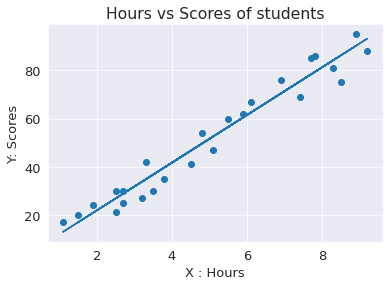

In [41]:
plt.scatter(x,y)
plt.plot(x,reg_line)
plt.xlabel("X : Hours")
plt.ylabel("Y: Scores")
plt.title("Hours vs Scores of students")

**Predicting the score when given number of hours studied is 9.25**

In [42]:
sample = [[9.25]]
print("Expected Score of Student if he studies for 9.25 hrs: ",lm.predict(sample)[0].round(2))

Expected Score of Student if he studies for 9.25 hrs:  93.69






**Evaluating Model Preformance**

In [43]:
print("Performance on Test Set")
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean squared Error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))

Performance on Test Set
Mean Absolute Error:  4.183859899002982
Mean squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373


In [44]:
print("Train set Accuracy: ",lm.score(x_train,y_train)*100,"%")
print("Test set Accuarcy:" ,lm.score(x_test,y_test)*100,'%')


Train set Accuracy:  95.15510725211553 %
Test set Accuarcy: 94.54906892105353 %


**What will be predicted score if a student studies for 9.25 hrs/ day?**


> Expected Score of Student if he studies for **9.25 hrs** is  **93.69** .



**THANK YOU :)**